<a href="https://colab.research.google.com/github/manjusha-0103/DSML/blob/main/LInearRegression(DeepNeuralNetwork_).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [120]:

import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

train_data = pd.read_csv("/content/drive/MyDrive/BE/sem2/Practical1/boston_train.csv")




In [121]:
train_data.isnull().sum()


ID         0
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [122]:
train_data.info()
train_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       333 non-null    int64  
 1   crim     333 non-null    float64
 2   zn       333 non-null    float64
 3   indus    333 non-null    float64
 4   chas     333 non-null    int64  
 5   nox      333 non-null    float64
 6   rm       333 non-null    float64
 7   age      333 non-null    float64
 8   dis      333 non-null    float64
 9   rad      333 non-null    int64  
 10  tax      333 non-null    int64  
 11  ptratio  333 non-null    float64
 12  black    333 non-null    float64
 13  lstat    333 non-null    float64
 14  medv     333 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


In [123]:
#ID columns does not relevant for our analysis.
train_data.drop('ID', axis = 1, inplace=True)
train_data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,0.17783,0.0,9.69,0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
329,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
330,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
331,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9


In this plot its clearly to see a linear pattern. Wheter more average number of rooms per dwelling, more expensive the median value is.

<Axes: xlabel='rm', ylabel='medv'>

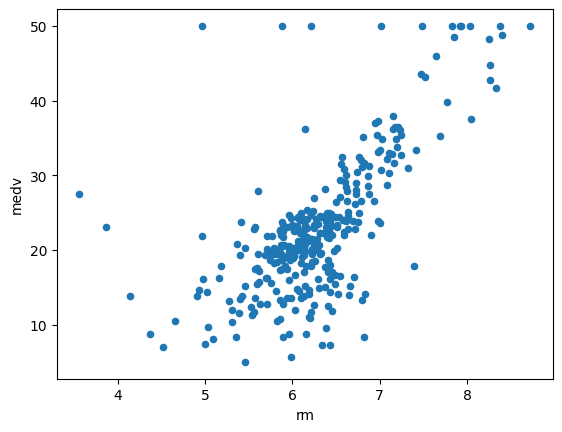

In [124]:
train_data.plot.scatter('rm', 'medv')




At this heatmap plot, we can do our analysis better than the pairplot.

Lets focus ate the last line, where y = medv:

When shades of Red/Orange: the more red the color is on X axis, smaller the medv. Negative correlation When light colors: those variables at axis x and y, they dont have any relation. Zero correlation When shades of Gray/Black : the more black the color is on X axis, more higher the value med is. Positive correlation

<Axes: >

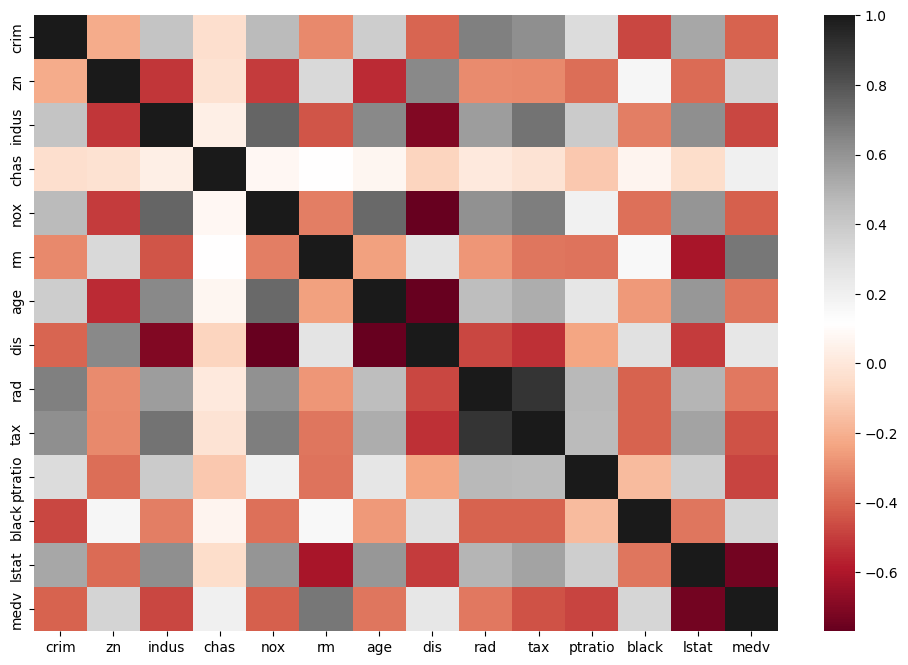

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.subplots(figsize=(12,8))
sns.heatmap(train_data.corr(), cmap = 'RdGy')

**Trainning Linear Regression Model**

---


Define X and Y

X: Varibles named as predictors, independent variables, features.
Y: Variable named as response or dependent variable

In [126]:
X = train_data[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat']]
y = train_data['medv']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

**Next, let's normalize the features using the mean and standard deviation of the training set:**



In [127]:
# Normalize features
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)

X_train = (X_train - mean) / std
X_test = (X_test - mean) / std


**Deep Neural Network Model**

Since we are doing linear regression, we only need one output node. We will use mean squared error as the loss function and Adam as the optimizer:

In [133]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, input_shape=[13])
])

model.compile(loss='mean_squared_error', optimizer='adam')

In [134]:
model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))
model.summary()

Epoch 1/100
9/9 [==============================] - 1s 20ms/step - loss: 612.2423 - val_loss: 588.6263
Epoch 2/100
9/9 [==============================] - 0s 5ms/step - loss: 611.2130 - val_loss: 587.7025
Epoch 3/100
9/9 [==============================] - 0s 7ms/step - loss: 610.0930 - val_loss: 586.8856
Epoch 4/100
9/9 [==============================] - 0s 6ms/step - loss: 609.0423 - val_loss: 586.0685
Epoch 5/100
9/9 [==============================] - 0s 5ms/step - loss: 608.0239 - val_loss: 585.2390
Epoch 6/100
9/9 [==============================] - 0s 7ms/step - loss: 606.9658 - val_loss: 584.3973
Epoch 7/100
9/9 [==============================] - 0s 6ms/step - loss: 605.8687 - val_loss: 583.5712
Epoch 8/100
9/9 [==============================] - 0s 8ms/step - loss: 604.9094 - val_loss: 582.6962
Epoch 9/100
9/9 [==============================] - 0s 8ms/step - loss: 603.7466 - val_loss: 581.9009
Epoch 10/100
9/9 [==============================] - 0s 7ms/step - loss: 602.7336 - val_los

In [138]:
mse = model.evaluate(X_test, y_test)
print("MSE:", mse)


3/3 [==============================] - 0s 4ms/step - loss: 528.6489
MSE: 528.6488647460938


In [139]:
 from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(128, input_shape=(13, ), activation='relu', name='dense_1'))
model.add(Dense(64, activation='relu', name='dense_2'))
model.add(Dense(1, activation='linear', name='dense_output'))

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 128)               1792      
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_output (Dense)        (None, 1)                 65        
                                                                 
Total params: 10,113
Trainable params: 10,113
Non-trainable params: 0
_________________________________________________________________


In [140]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.05)

Epoch 1/100
8/8 [==============================] - 2s 28ms/step - loss: 572.3674 - mae: 22.2095 - val_loss: 625.3279 - val_mae: 22.4090
Epoch 2/100
8/8 [==============================] - 0s 9ms/step - loss: 526.0388 - mae: 21.1808 - val_loss: 570.6383 - val_mae: 21.2409
Epoch 3/100
8/8 [==============================] - 0s 7ms/step - loss: 472.3093 - mae: 19.8964 - val_loss: 503.0836 - val_mae: 19.7502
Epoch 4/100
8/8 [==============================] - 0s 6ms/step - loss: 404.0882 - mae: 18.2290 - val_loss: 423.0027 - val_mae: 17.8646
Epoch 5/100
8/8 [==============================] - 0s 10ms/step - loss: 323.3379 - mae: 16.0966 - val_loss: 329.5937 - val_mae: 15.4496
Epoch 6/100
8/8 [==============================] - 0s 6ms/step - loss: 234.2542 - mae: 13.4598 - val_loss: 231.9198 - val_mae: 12.7356
Epoch 7/100
8/8 [==============================] - 0s 9ms/step - loss: 154.9947 - mae: 10.5273 - val_loss: 137.9201 - val_mae: 9.6690
Epoch 8/100
8/8 [==============================] - 0s 

In [141]:
mse = model.evaluate(X_test, y_test)
print("MSE:", mse)

3/3 [==============================] - 0s 5ms/step - loss: 10.8816 - mae: 2.4174
MSE: [10.881556510925293, 2.4173593521118164]


**By plotting both loss and mean average error, we can see that our model was capable of learning patterns in our data without overfitting taking place (as shown by the validation set curves):**

In [142]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scattergl(y=history.history['loss'],
                    name='Train'))

fig.add_trace(go.Scattergl(y=history.history['val_loss'],
                    name='Valid'))


fig.update_layout(height=500, width=700,
                  xaxis_title='Epoch',
                  yaxis_title='Loss')

fig.show()

In [143]:
fig = go.Figure()
fig.add_trace(go.Scattergl(y=history.history['mae'],
                    name='Train'))

fig.add_trace(go.Scattergl(y=history.history['val_mae'],
                    name='Valid'))


fig.update_layout(height=500, width=700,
                  xaxis_title='Epoch',
                  yaxis_title='Mean Absolute Error')

fig.show()